In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sales Data

In [2]:
sales = pd.read_csv("../data/201904 sales reciepts.csv",
                    usecols=['transaction_id', 'customer_id', 'product_id', 'quantity'])

In [3]:
sales.head()

,transaction_id,customer_id,product_id,quantity
0,7,558,52,1
1,11,781,27,2
2,19,788,46,2
3,32,683,23,2
4,33,99,34,1


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   transaction_id  49894 non-null  int64
 1   customer_id     49894 non-null  int64
 2   product_id      49894 non-null  int64
 3   quantity        49894 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


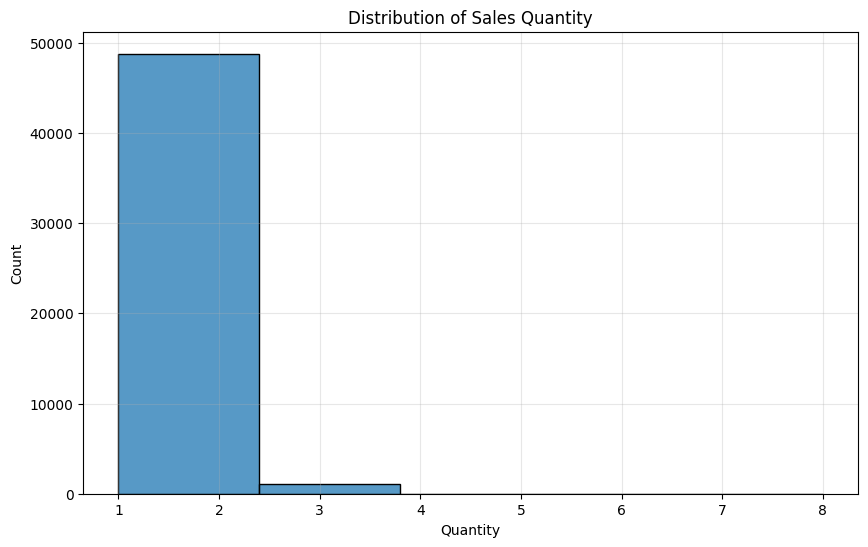

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sales, x='quantity', bins=5)
plt.title('Distribution of Sales Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Product Data

In [23]:
product = pd.read_csv("../data/product.csv",
                      usecols=['product_id', 'product_category', 'product'])

In [6]:
product.head()

,product_id,product_category,product
0,1,Coffee beans,Brazilian - Organic
1,2,Coffee beans,Our Old Time Diner Blend
2,3,Coffee beans,Espresso Roast
3,4,Coffee beans,Primo Espresso Roast
4,5,Coffee beans,Columbian Medium Roast


In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        88 non-null     int64 
 1   product_category  88 non-null     object
 2   product           88 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


In [26]:
product.product_category.nunique()

9

In [27]:
product['product'].nunique()

88

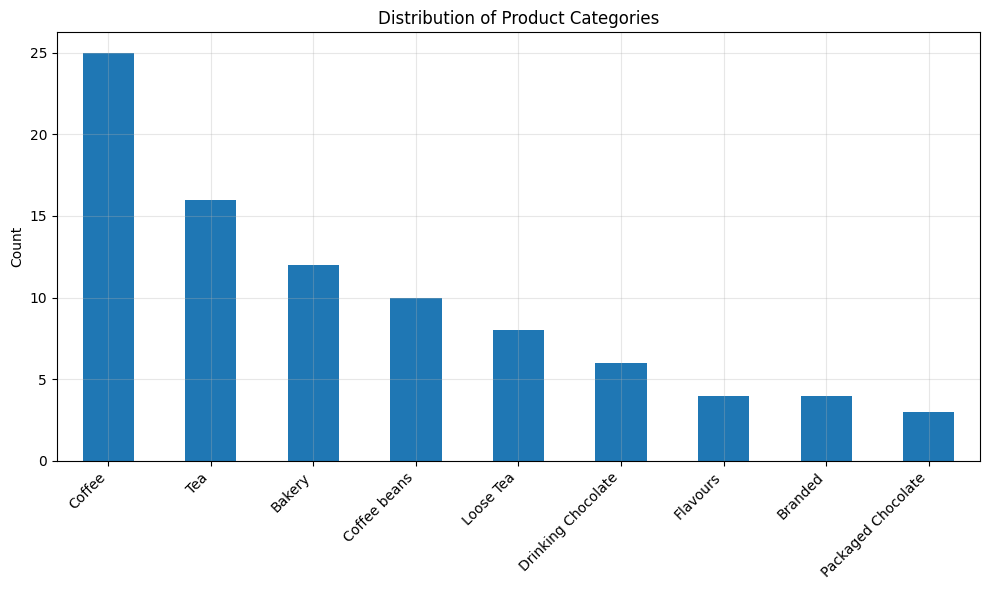

In [31]:
plt.figure(figsize=(10, 6))
product['product_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Product Categories')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, alpha=0.3)

# Merge Sales & Product

In [33]:
df = sales.merge(product, "left", "product_id")
df.head()

,transaction_id,customer_id,product_id,quantity,product_category,product
0,7,558,52,1,Tea,Traditional Blend Chai Rg
1,11,781,27,2,Coffee,Brazilian Lg
2,19,788,46,2,Tea,Serenity Green Tea Rg
3,32,683,23,2,Coffee,Our Old Time Diner Blend Rg
4,33,99,34,1,Coffee,Jamaican Coffee River Sm


In [9]:
df.isna().sum()

transaction_id      0
customer_id         0
product_id          0
quantity            0
product_category    0
product             0
dtype: int64

# Data Wrangling

### remove sizes

In [10]:
df[df['product'].str.contains('Coffee')]['product'].unique()

array(['Jamaican Coffee River Sm', 'Jamaican Coffee River Rg',
       'Jamaican Coffee River Lg', 'Jamacian Coffee River'], dtype=object)

contains size Sm, Lg, Rg
need to be removed

In [11]:
df['product'].nunique()

80

In [12]:
df['product'] = \
df['product']\
.str.replace(" Sm", "")\
.str.replace(" Lg", "")\
.str.replace(" Rg", "")

In [13]:
df['product'].nunique()

45

nunique before: 80\
nunique after: 45

### choose products

In [36]:
chosen_products = [
    'Cappuccino', 'Latte', 'Espresso shot',
    'Dark chocolate','Sugar Free Vanilla syrup', 'Chocolate syrup',
    'Carmel syrup', 'Hazelnut syrup', 'Ginger Scone',
    'Chocolate Croissant', 'Jumbo Savory Scone', 'Cranberry Scone', 'Hazelnut Biscotti',
    'Croissant', 'Almond Croissant', 'Oatmeal Scone', 'Chocolate Chip Biscotti',
    'Ginger Biscotti'
]

In [37]:
df = df[df['product'].isin(chosen_products)]

In [38]:
df['product'].nunique()

18

In [46]:
df.product_category.nunique()

4

In [45]:
df.shape

(12137, 6)

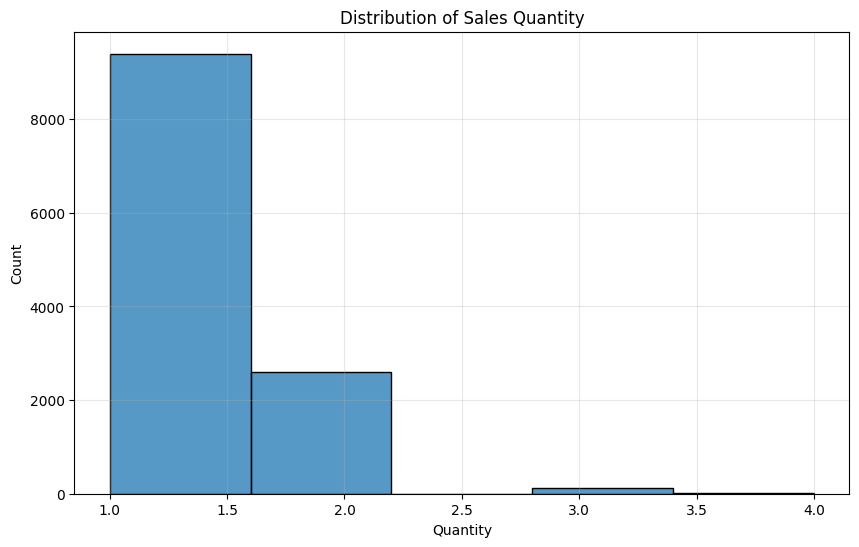

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='quantity', bins=5)
plt.title('Distribution of Sales Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

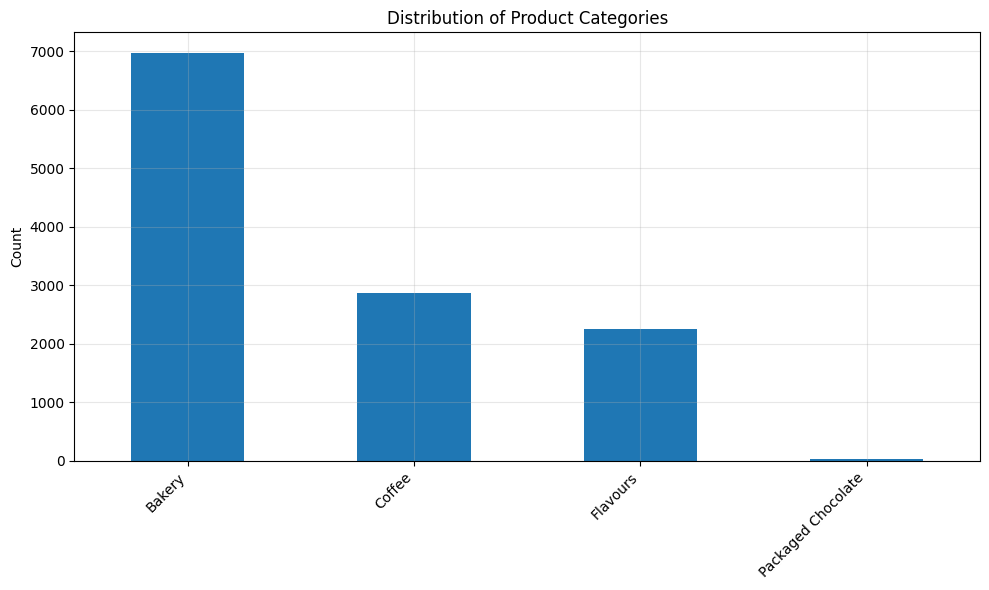

In [48]:
plt.figure(figsize=(10, 6))
df['product_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Product Categories')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, alpha=0.3)

# Remove Single-Item Transactions

In [ ]:
df['transaction'] = df['transaction_id'].astype(str) + "_" + df['customer_id'].astype(str)

In [23]:
df = df[df.groupby("transaction")["transaction"].transform("size") > 1]

In [24]:
df.shape

(10189, 7)

# Product Popularity

In [25]:
df['product_category'].value_counts()

product_category
Bakery                3800
Coffee                3174
Flavours              2246
Drinking Chocolate     947
Packaged Chocolate      22
Name: count, dtype: int64

In [26]:
df['product'].value_counts()

product
Cappuccino                  1290
Latte                       1256
Dark chocolate               969
Chocolate Croissant          636
Espresso shot                628
Sugar Free Vanilla syrup     605
Chocolate syrup              568
Carmel syrup                 561
Hazelnut syrup               512
Ginger Scone                 417
Jumbo Savory Scone           357
Croissant                    355
Chocolate Chip Biscotti      352
Cranberry Scone              350
Almond Croissant             347
Hazelnut Biscotti            338
Oatmeal Scone                334
Ginger Biscotti              314
Name: count, dtype: int64

# Popularity-Based Recommendation Engine

In [33]:
df.groupby(['product', 'product_category']).size().reset_index(name="number_of_transactions").to_csv("../recommendation_objects/popularity_recommendation.csv", index=False)

# Apriori Recommendation Engine

In [38]:
train_basket = df.groupby(['transaction', 'product']).size().reset_index(name="count")

In [39]:
train_basket

,transaction,product,count
0,1000_0,Dark chocolate,1
1,1000_0,Oatmeal Scone,1
2,1001_8306,Cappuccino,1
3,1001_8306,Carmel syrup,1
4,1002_0,Carmel syrup,1
...,...,...,...
8391,9_0,Croissant,1
8392,9_0,Dark chocolate,3
8393,9_0,Ginger Scone,2
8394,9_0,Latte,3


In [41]:
train_basket['count'] = train_basket['count'].clip(upper=1)

In [46]:
train_basket = train_basket.pivot_table('count', 'transaction', 'product').fillna(0)
train_basket

product,Almond Croissant,Cappuccino,Carmel syrup,Chocolate Chip Biscotti,Chocolate Croissant,Chocolate syrup,Cranberry Scone,Croissant,Dark chocolate,Espresso shot,Ginger Biscotti,Ginger Scone,Hazelnut Biscotti,Hazelnut syrup,Jumbo Savory Scone,Latte,Oatmeal Scone,Sugar Free Vanilla syrup
transaction,,,,,,,,,,,,,,,,,,
1000_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1001_8306,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002_0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1004_5383,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1005_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998_5530,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998_5793,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
998_601,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
frequent_items = apriori(train_basket, min_support = 0.05, use_colnames = True)
frequent_items.head()

/opt/anaconda3/envs/coffeeshop/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.115646,(Almond Croissant)
1,0.388889,(Cappuccino)
2,0.191232,(Carmel syrup)
3,0.112623,(Chocolate Chip Biscotti)
4,0.135676,(Chocolate Croissant)


In [50]:
rules_basket = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules_basket.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Almond Croissant),(Cappuccino),0.115646,0.388889,0.053288,0.460784,1.184874,0.008314,1.133333,0.176432
1,(Cappuccino),(Almond Croissant),0.388889,0.115646,0.053288,0.137026,1.184874,0.008314,1.024775,0.255319
2,(Almond Croissant),(Dark chocolate),0.115646,0.277022,0.057445,0.496732,1.793115,0.025409,1.436567,0.500152
3,(Dark chocolate),(Almond Croissant),0.277022,0.115646,0.057445,0.207367,1.793115,0.025409,1.115717,0.611791
4,(Almond Croissant),(Latte),0.115646,0.382086,0.054422,0.470588,1.231629,0.010235,1.167171,0.212660


### get example recommendation from rules basket

In [51]:
rules_basket[rules_basket['antecedents']=={'Cappuccino'}].sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(Cappuccino),(Sugar Free Vanilla syrup),0.388889,0.200302,0.113001,0.290573,1.450674,0.035105,1.127245,0.508361
12,(Cappuccino),(Chocolate syrup),0.388889,0.188964,0.109599,0.281827,1.491429,0.036113,1.129304,0.539185
6,(Cappuccino),(Carmel syrup),0.388889,0.191232,0.102797,0.264334,1.382270,0.028429,1.099369,0.452540
22,(Cappuccino),(Hazelnut syrup),0.388889,0.171580,0.090325,0.232264,1.353682,0.023600,1.079044,0.427539
20,(Cappuccino),(Ginger Scone),0.388889,0.133409,0.059713,0.153547,1.150951,0.007832,1.023791,0.214614
8,(Cappuccino),(Chocolate Chip Biscotti),0.388889,0.112623,0.056311,0.144801,1.285714,0.012514,1.037626,0.363636
10,(Cappuccino),(Chocolate Croissant),0.388889,0.135676,0.056311,0.144801,1.067250,0.003548,1.010669,0.103112
16,(Cappuccino),(Croissant),0.388889,0.114135,0.056311,0.144801,1.268685,0.011926,1.035859,0.346553
24,(Cappuccino),(Jumbo Savory Scone),0.388889,0.114890,0.055178,0.141885,1.234962,0.010498,1.031458,0.311333
18,(Cappuccino),(Ginger Biscotti),0.388889,0.106198,0.053666,0.137998,1.299441,0.012367,1.036891,0.377081


### save rules basket in json format

In [70]:
product_category = df[['product', 'product_category']].drop_duplicates().set_index('product').to_dict()['product_category']
product_category

{'Cappuccino': 'Coffee',
 'Jumbo Savory Scone': 'Bakery',
 'Latte': 'Coffee',
 'Chocolate Chip Biscotti': 'Bakery',
 'Espresso shot': 'Coffee',
 'Hazelnut Biscotti': 'Bakery',
 'Chocolate Croissant': 'Bakery',
 'Dark chocolate': 'Packaged Chocolate',
 'Cranberry Scone': 'Bakery',
 'Croissant': 'Bakery',
 'Almond Croissant': 'Bakery',
 'Ginger Biscotti': 'Bakery',
 'Oatmeal Scone': 'Bakery',
 'Ginger Scone': 'Bakery',
 'Chocolate syrup': 'Flavours',
 'Hazelnut syrup': 'Flavours',
 'Carmel syrup': 'Flavours',
 'Sugar Free Vanilla syrup': 'Flavours'}

In [102]:
apriori_recommendations = {}
antecedents = rules_basket['antecedents'].unique()

for antecedent in antecedents:
    key = "_".join(antecedent)
    df_rec = rules_basket[rules_basket['antecedents']==antecedent].sort_values('confidence', ascending=False)
    apriori_recommendations[key] = []

    seen_products = set()

    for _, row in df_rec.iterrows():
        for consequent in row['consequents']:

            if consequent not in seen_products:
                seen_products.add(consequent)

                rec = {
                    'product': consequent,
                    'product_category': product_category[consequent],
                    'confidence': row['confidence']
                }

                apriori_recommendations[key].append(rec)

In [104]:
from pprint import pprint
pprint(apriori_recommendations)

{'Almond Croissant': [{'confidence': 0.4967320261437908,
                       'product': 'Dark chocolate',
                       'product_category': 'Packaged Chocolate'},
                      {'confidence': 0.47058823529411764,
                       'product': 'Latte',
                       'product_category': 'Coffee'},
                      {'confidence': 0.46078431372549017,
                       'product': 'Cappuccino',
                       'product_category': 'Coffee'}],
 'Cappuccino': [{'confidence': 0.29057337220602525,
                 'product': 'Sugar Free Vanilla syrup',
                 'product_category': 'Flavours'},
                {'confidence': 0.2818270165208941,
                 'product': 'Chocolate syrup',
                 'product_category': 'Flavours'},
                {'confidence': 0.26433430515063167,
                 'product': 'Carmel syrup',
                 'product_category': 'Flavours'},
                {'confidence': 0.23226433430515062,
     

In [105]:
import json

with open('../recommendation_objects/apriori_recommendations.json', 'w') as f:
    json.dump(apriori_recommendations, f)